In [10]:
import numpy as np
from scipy.integrate import solve_ivp
from SALib.sample import saltelli, sobol, fast_sampler
from SALib.analyze import sobol, fast
import seaborn as sns
import SALib
import matplotlib.pyplot as plt
import math
from scipy.optimize import fsolve
from scipy.constants import N_A

In [11]:
Target_cell_number = 2e5
well_size = 150e-6
r_ab = 1.25e-6 # in cm
t_end = 60*60*10
t = np.geomspace(1e-10, t_end, 20)
tspan = [1e-10, t_end]
z0 = [0, 0, 0]
z01 = [0, 0]
T_cell_radius = 5e-4 #cm
T_cell_surface_area = 4*math.pi*((T_cell_radius)**2)
reaction_volume = (2/3)*math.pi*((r_ab)**3)
tumour_cell_radius = 8e-6
tumour_cell_surface_area = 4*math.pi*((tumour_cell_radius)**2)

In [12]:
sigma = well_size*N_A/Target_cell_number

def A1_steady_state(x, Ainit, k1, koff, k2, rtot, dummy):
    k1 = k1/sigma
    Atot = sigma*Ainit
    express = 2*k1*(rtot - x - 2*(k2*x*(rtot-x)/(2*(koff + k2*x))))*(Atot - x - (k2*x*(rtot-x)/(2*(koff + k2*x)))) -koff*x - k2*x*(rtot - x - 2*(k2*x*(rtot-x)/(2*(koff + k2*x)))) +2*koff*(k2*x*(rtot-x)/(2*(koff + k2*x)))

    return express

def A2_steady_state(x, k2, koff, rtot, dummy):
    express = k2*x*(rtot-x)/(2*(koff + k2*x))

    return express



In [13]:

problem1 = {
    'num_vars': 5,
    'names': ['rtot', 'kon', 'D', 'koff', 'dummy'],
    'bounds': [[4, 6],
               [4, 6],
               [-15, -13],
               [-6, -4],
               [1, 1000]]
}

problem2 = {
    'num_vars': 4,
    'names': ['kon', 'k2', 'koff', 'dummy'],
    'bounds': [[1e3, 1e7],
               [1e4, 1e6],
               [1e-6, 1e-1],
               [1, 1000]]
}


vals = SALib.sample.sobol.sample(problem1, 65536)
Y_ag1 = np.zeros(len(vals))
Y_ag2 = np.zeros(len(vals))
Y_ab = np.zeros(len(vals))
indicies_ag1 = []
indicies_ag2 = []
indicies_ab = []
A0s = [1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
Y = np.zeros(len(vals))
indicies = []
indicies_1 = []

In [14]:
65536

65536

In [15]:
sol_holder = []
for Ainit in A0s:
    print(Ainit)
    for i, params in enumerate(vals):
     
        rtot = params[0]
        rtot  = 10**rtot
        kon = params[1]
        kon = 10**kon
        D = params[2]
        D = 10**D
        koff = params[3]
        koff = 10**koff
        dummy = params[4]

        k2 = 4*D/tumour_cell_surface_area

        guess = 0

        A1_st = fsolve(A1_steady_state, [guess], args=(Ainit, kon, koff, k2, rtot, dummy))
        A2_st = A2_steady_state(A1_st, k2, koff, rtot, dummy)
        if (A1_st < 0) or (A2_st < 0) :
            print('negative')
        
        if ((A1_st + 2*A2_st) > rtot):
            print('blown up')
        Ag =(A1_st + 2*A2_st)/rtot
        Y[i] = Ag
    
    Si = sobol.analyze(problem1, Y, print_to_console=True)
    indicies.append(Si['ST'])
    indicies_1.append(Si['S1'])


1e-11
             ST   ST_conf
rtot   0.999647  0.008451
kon    0.001067  0.000129
D      0.001084  0.000129
koff   0.002096  0.000192
dummy  0.000000  0.000000
             S1   S1_conf
rtot   0.997087  0.011703
kon   -0.000081  0.000317
D     -0.000011  0.000368
koff   0.000145  0.000500
dummy  0.000000  0.000000
                     S2   S2_conf
(rtot, kon)    0.000634  0.016487
(rtot, D)      0.000562  0.016502
(rtot, koff)   0.001148  0.016664
(rtot, dummy)  0.000269  0.016370
(kon, D)       0.000105  0.000527
(kon, koff)    0.000146  0.000521
(kon, dummy)   0.000081  0.000546
(D, koff)      0.000102  0.000511
(D, dummy)     0.000044  0.000516
(koff, dummy) -0.000375  0.000797
1e-10
             ST   ST_conf
rtot   0.999545  0.007971
kon    0.000312  0.000019
D      0.000312  0.000018
koff   0.000646  0.000026
dummy  0.000000  0.000000
             S1   S1_conf
rtot   0.999104  0.008803
kon    0.000065  0.000189
D      0.000054  0.000196
koff   0.000173  0.000306
dummy  0.000000 

/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


             ST   ST_conf
rtot   0.907770  0.008910
kon    0.043902  0.002813
D      0.043059  0.002696
koff   0.086669  0.004465
dummy  0.000000  0.000000
             S1   S1_conf
rtot   0.883047  0.043587
kon    0.012419  0.002247
D      0.010162  0.002364
koff   0.035127  0.003336
dummy  0.000000  0.000000
                     S2   S2_conf
(rtot, kon)    0.001281  0.084691
(rtot, D)      0.002623  0.084216
(rtot, koff)   0.009215  0.084410
(rtot, dummy)  0.000058  0.084357
(kon, D)       0.002662  0.003560
(kon, koff)    0.012810  0.003847
(kon, dummy)  -0.001628  0.003279
(D, koff)      0.014269  0.003205
(D, dummy)     0.000647  0.002939
(koff, dummy) -0.000380  0.004744
1e-08


/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


             ST   ST_conf
rtot   0.329317  0.016984
kon    0.360441  0.023434
D      0.335033  0.020127
koff   0.680407  0.031977
dummy  0.000000  0.000000
             S1   S1_conf
rtot   0.070584  0.008048
kon    0.079725  0.008198
D      0.069645  0.007128
koff   0.250159  0.014355
dummy  0.000000  0.000000
                     S2   S2_conf
(rtot, kon)    0.029974  0.018034
(rtot, D)      0.024006  0.016486
(rtot, koff)   0.092537  0.021691
(rtot, dummy) -0.000695  0.014024
(kon, D)       0.030633  0.017927
(kon, koff)    0.107243  0.019851
(kon, dummy)  -0.001302  0.013747
(D, koff)      0.097612  0.020389
(D, dummy)     0.002809  0.013180
(koff, dummy) -0.001725  0.020038
1e-07


/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


             ST   ST_conf
rtot   0.319275  0.015904
kon    0.393537  0.021569
D      0.320035  0.020514
koff   0.680665  0.029467
dummy  0.000000  0.000000
             S1   S1_conf
rtot   0.066715  0.007007
kon    0.087066  0.010876
D      0.064072  0.006380
koff   0.249745  0.015499
dummy  0.000000  0.000000
                     S2   S2_conf
(rtot, kon)    0.033126  0.015914
(rtot, D)      0.019250  0.013817
(rtot, koff)   0.087408  0.018620
(rtot, dummy) -0.000721  0.011378
(kon, D)       0.033207  0.020647
(kon, koff)    0.116865  0.026760
(kon, dummy)  -0.001500  0.016807
(D, koff)      0.090895  0.019024
(D, dummy)     0.003062  0.011059
(koff, dummy) -0.001842  0.020806
1e-06


/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


             ST   ST_conf
rtot   0.281227  0.015802
kon    0.462985  0.022649
D      0.281038  0.015660
koff   0.682974  0.031721
dummy  0.000000  0.000000
             S1   S1_conf
rtot   0.055698  0.006416
kon    0.107889  0.011888
D      0.053034  0.005645
koff   0.254645  0.014566
dummy  0.000000  0.000000
                     S2   S2_conf
(rtot, kon)    0.038075  0.014249
(rtot, D)      0.010289  0.012510
(rtot, koff)   0.073099  0.017556
(rtot, dummy) -0.000351  0.011259
(kon, D)       0.037781  0.022045
(kon, koff)    0.143620  0.027780
(kon, dummy)  -0.001940  0.018346
(D, koff)      0.076544  0.015102
(D, dummy)     0.003012  0.009629
(koff, dummy) -0.001919  0.021497
1e-05


/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


             ST   ST_conf
rtot   0.203416  0.010646
kon    0.553052  0.024399
D      0.202500  0.011156
koff   0.689964  0.027865
dummy  0.000000  0.000000
             S1   S1_conf
rtot   0.037413  0.004900
kon    0.151441  0.013022
D      0.036319  0.005423
koff   0.270750  0.015334
dummy  0.000000  0.000000
                     S2   S2_conf
(rtot, kon)    0.038571  0.011956
(rtot, D)      0.002768  0.010217
(rtot, koff)   0.049995  0.013998
(rtot, dummy)  0.000658  0.008733
(kon, D)       0.037620  0.018117
(kon, koff)    0.200825  0.028390
(kon, dummy)  -0.002158  0.016659
(D, koff)      0.051743  0.012974
(D, dummy)     0.001417  0.009227
(koff, dummy) -0.001542  0.020998


/var/folders/fj/3c6fc0c93lg7p91tnylb8zj80000gn/T/ipykernel_39452/2395288657.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('Dark2')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


7


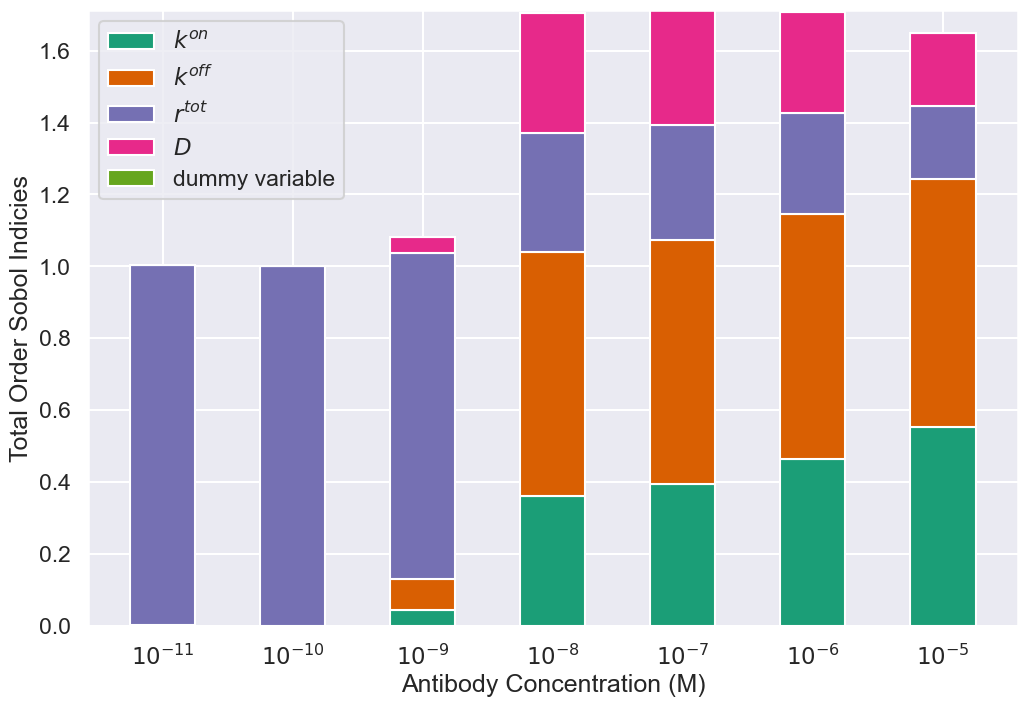

In [16]:

kon_si = np.zeros(len(A0s))
koff_si = np.zeros(len(A0s))
D_si = np.zeros(len(A0s))
rtot_si = np.zeros(len(A0s))
dummy_si = np.zeros(len(A0s))


for i in range(len(indicies)):
    vals = indicies[i]
    rtot_si[i] = vals[0]
    kon_si[i] = vals[1]
    D_si[i] = vals[2]
    koff_si[i] = vals[3]
    dummy_si[i] = vals[4]

print(len(indicies))
ab_conc = ( r'$10^{-11}$', r'$10^{-10}$', r'$10^{-9}$', r'$10^{-8}$', r'$10^{-7}$', r'$10^{-6}$', r'$10^{-5}$')


sns.set_theme()
sns.set_context("talk")

width = 0.5
fig, ax = plt.subplots(figsize=(12,8))
bottom = np.zeros(7)

cm = plt.cm.get_cmap('Dark2')
ax.bar(ab_conc, kon_si, width, label=r'$k^{on}$', bottom= bottom, color=cm(0))
bottom+= kon_si
ax.bar(ab_conc, koff_si, width, label=r'$k^{off}$', bottom= bottom, color=cm(1))
bottom+= koff_si
ax.bar(ab_conc, rtot_si, width, label=r'$r^{tot}$', bottom= bottom, color=cm(2))
bottom+= rtot_si
ax.bar(ab_conc, D_si, width, label=r'$D$', bottom= bottom, color=cm(3))
bottom+= D_si
ax.bar(ab_conc, dummy_si, width, label='dummy variable', bottom=bottom, color=cm(4))
ax.legend(loc='best')
ax.set_xlabel('Antibody Concentration (M)')
ax.set_ylabel('Total Order Sobol Indicies')
plt.savefig('/Users/lukeheirene/ADCC-Project/Figures/model_s_receptor_occupancy_total_order_sensiv_analysis.eps')

7


Text(0, 0.5, 'Total Order Sobol Indicies')

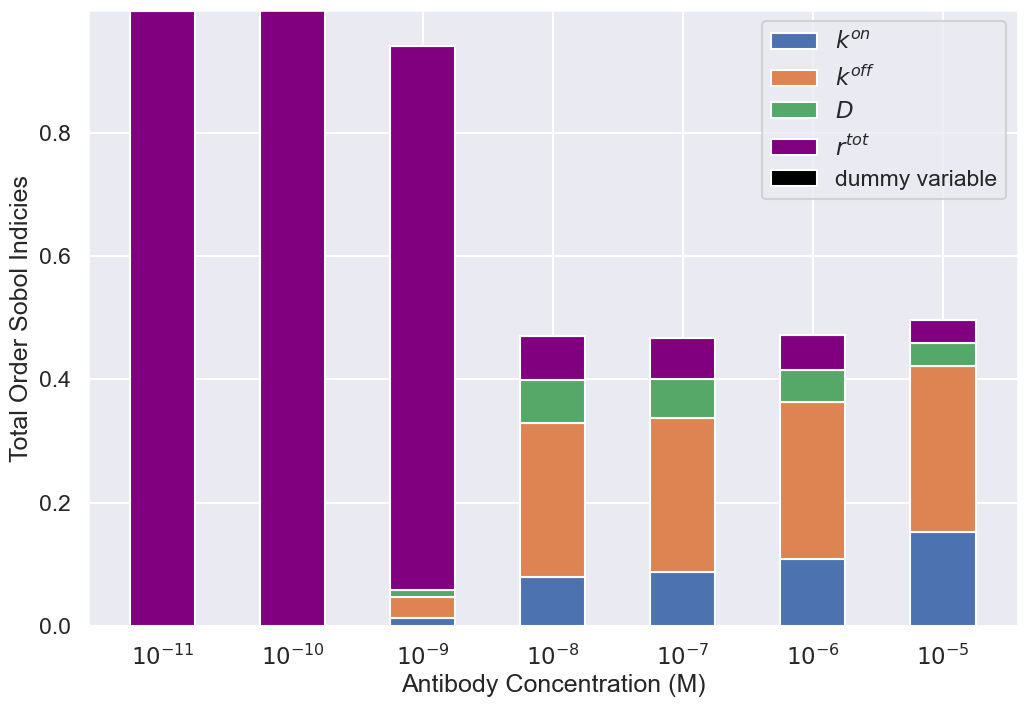

In [17]:
kon_si = np.zeros(len(A0s))
koff_si = np.zeros(len(A0s))
D_si = np.zeros(len(A0s))
rtot_si = np.zeros(len(A0s))
dummy_si = np.zeros(len(A0s))

for i in range(len(indicies_1)):
    vals = indicies_1[i]
    rtot_si[i] = vals[0]
    kon_si[i] = vals[1]
    D_si[i] = vals[2]
    koff_si[i] = vals[3]
    dummy_si[i] = vals[4]

print(len(indicies_1))
ab_conc = ( r'$10^{-11}$', r'$10^{-10}$', r'$10^{-9}$', r'$10^{-8}$', r'$10^{-7}$', r'$10^{-6}$', r'$10^{-5}$')

param_indicies = {
    r"$k^{on}$": kon_si,
    r"$k^{off}$": koff_si,
    r"$D$": D_si,
    
}

sns.set_theme()
sns.set_context("talk")

width = 0.5
fig, ax = plt.subplots(figsize=(12,8))
bottom = np.zeros(7)

for boolean, param_indicie in param_indicies.items():
    p = ax.bar(ab_conc, param_indicie, width, label=boolean, bottom=bottom)
    bottom += param_indicie
ax.bar(ab_conc, rtot_si, width, label=r'$r^{tot}$', bottom= bottom, color='purple')
bottom+= rtot_si
ax.bar(ab_conc, dummy_si, width, label='dummy variable', bottom=bottom, color='black')
ax.legend(loc='best')
ax.set_xlabel('Antibody Concentration (M)')
ax.set_ylabel('Total Order Sobol Indicies')
#plt.savefig('/Users/lukeheirene/ADCC-Project/Figures/model_s_bispecific_total_ab_sensiv_analysis.png')